<a href="https://colab.research.google.com/github/shobhitgoyal2002/Machine-Learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
w0 = 3
w1 = 4
n = 100

In [6]:
def generate_examples(n):
    X = 10 * np.random.random(n,)
    y = w0 + w1 * X
    return X,y

def add_dummy_feature(X):
    return np.column_stack((np.ones(X.shape[0]), X))
def preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

def plotdata(X,y):
    plt.figure(figsize=(8,8))
    sns.scatterplot(x = X, y =y)

In [7]:
def predict(X, w):
    if X.shape[1] == w.shape[0]:
        return X @ w
    else:
        return None

def loss(X, y, w=None):
    if w is None:
        w = np.zeros(X.shape[1])
    e = X @ w - y
    return 0.5 * (e.T @ e)

def rmse(X, y):
    return np.sqrt(2/X.shape[0] * loss(X, y))

In [8]:
X, y = generate_examples(100)
X_train, X_test, y_train, y_test = preprocess(X,y)
y_hat =  predict (X_train, np.random.rand(2,))
y_hat

array([7.79164014, 3.93591422, 6.51957162, 6.20096535, 8.51883759,
       7.37980587, 2.62921461, 2.73125889, 1.26140332, 7.42992129,
       7.05901023, 4.89302819, 2.62855741, 9.07070414, 4.59029436,
       8.73106124, 5.6883282 , 3.3099028 , 8.38821798, 3.79424966,
       8.97630691, 3.85034696, 5.54769679, 8.12146764, 3.5157667 ,
       5.99571832, 7.61495992, 2.5098437 , 6.65551668, 0.92038713,
       5.50516071, 3.67282191, 2.72358271, 7.57878701, 8.95831745,
       2.08297868, 8.46404134, 2.74773196, 6.86573488, 5.99289323,
       8.10885765, 5.20767189, 4.92779762, 2.71895159, 6.35009427,
       2.15181315, 2.11958077, 2.85630335, 7.13191462, 3.81418001,
       2.17808933, 7.37689067, 4.42979269, 8.09229625, 3.94512649,
       8.39077442, 6.67975582, 6.55668093, 5.971382  , 4.63700651,
       0.98621377, 1.40629049, 4.1521482 , 6.25830778, 2.6828224 ,
       2.22484853, 7.88364527, 7.60199284, 6.81495935, 5.00444586,
       1.24710709, 7.16363425, 8.8254658 , 7.25094599, 1.21323

In [9]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.array([1,1,1,1])

loss(X, y,w)

62.5

In [10]:
lr=0.0001
def normal_equation(X, y):
    return np.linalg.pinv(X) @ y
def calculate_gradient(X, y, w):
    return np.transpose(X) @ (predict(X,w) - y)

In [11]:
def weight_update(w,lr, g):
    return w - lr * g

def gradient_descent(X,y, epochs):
    losses = list()
    weights = list()
    w = np.zeros(X.shape[1])
    for i in range(epochs):
        l = loss(X_train, y_train, w)
        losses.append(l)
        g = calculate_gradient(X, y, w)
        w = weight_update(w, lr, g)
        weights.append(w)
    return weights, losses

In [12]:
def plot_learning_curves(losses):
    plt.plot(losses)

In [13]:
epochs = 10000
weights, losses = gradient_descent(X_train, y_train, epochs)
weights[-1]# last weight from the <epochs> trials.

array([2.99999999, 4.        ])

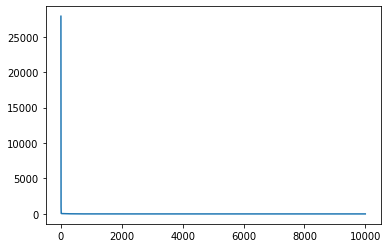

In [14]:
plot_learning_curves(losses)

In [15]:
# Stochastic Gradient Descent(SGD)

t1, t2 = 200, 10000
def learning_schedule(t):
    return t1 / (t + t2)


def sgd(X, y, iter):
    t = 0
    w = np.zeros(X.shape[1])
    weights, losses = list(), list()

    for i in range(iter):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, X.shape[0], mini_batch_size):
            t += 1
            x1 = X_shuffled[i:i+1]
            y1 = y_shuffled[i:i+1]

            l = loss(x1, y1, w)
            losses.append(l)

            g = 2/ mini_batch_size * calculate_gradient(x1, y1, w)
            w = weight_update(w, learning_schedule(t), g)
            weights.append(w)
    
    return weights, losses

In [18]:
mini_batch_size = 1
iterations = 20

X,y = generate_examples(100)

X_train, X_test, y_train, y_test = preprocess(X,y)
weights, losses = sgd(X_train, y_train, iterations)

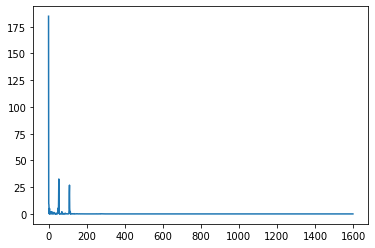

In [19]:
plot_learning_curves(losses)